Plot saved as 'stream_HBM_results.png'


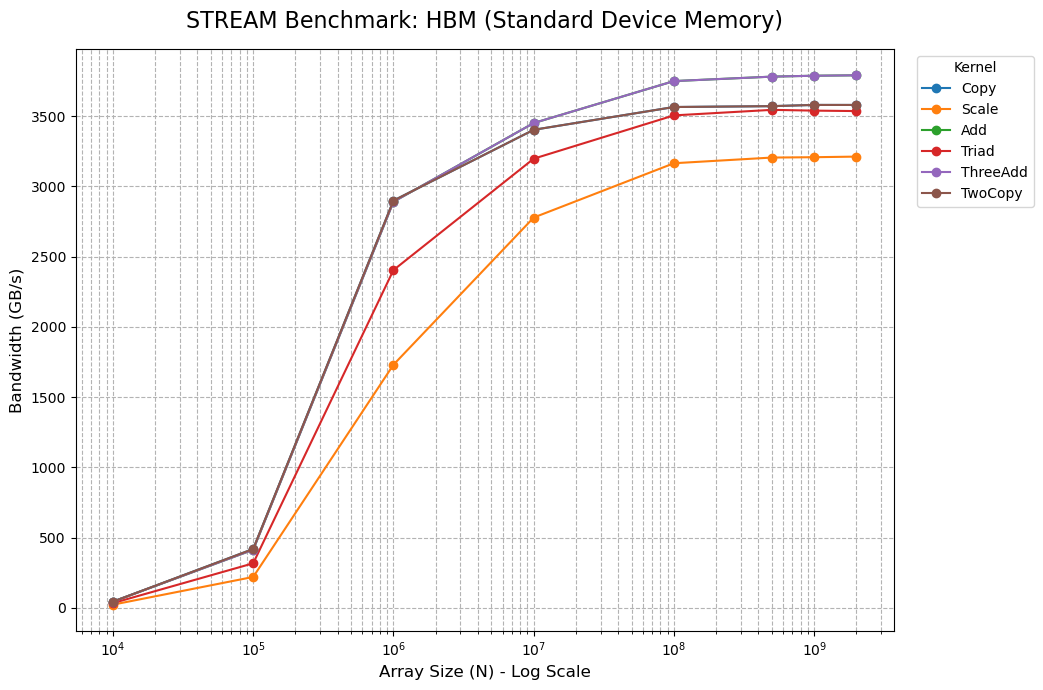

Plot saved as 'stream_ManagedHost_results.png'


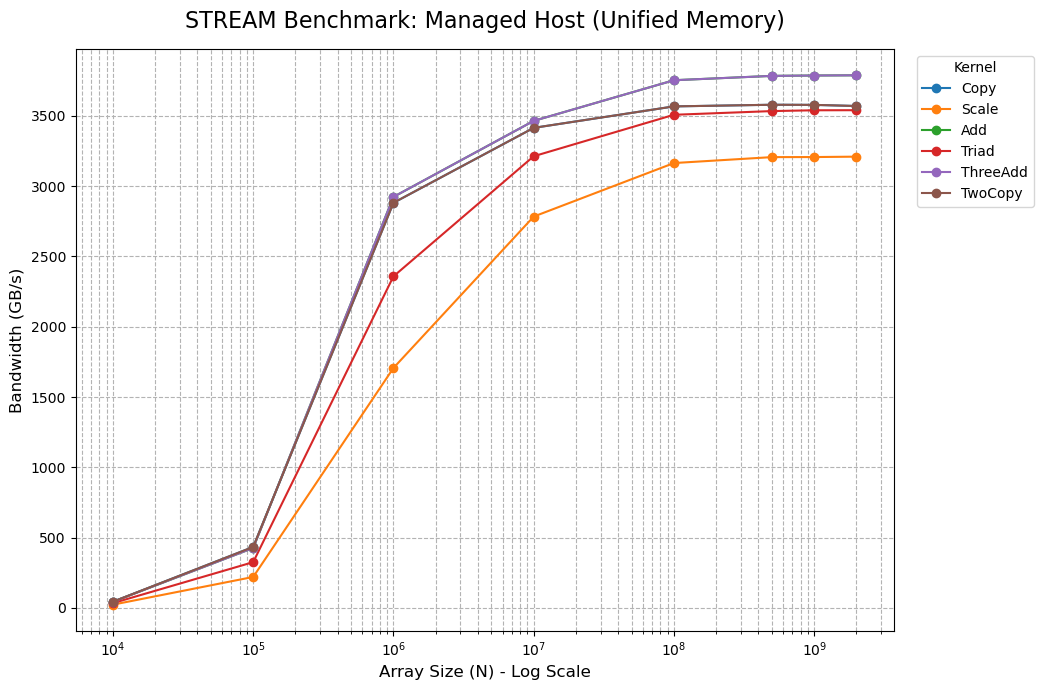

Plot saved as 'stream_LPDDR5NoMigrate_results.png'


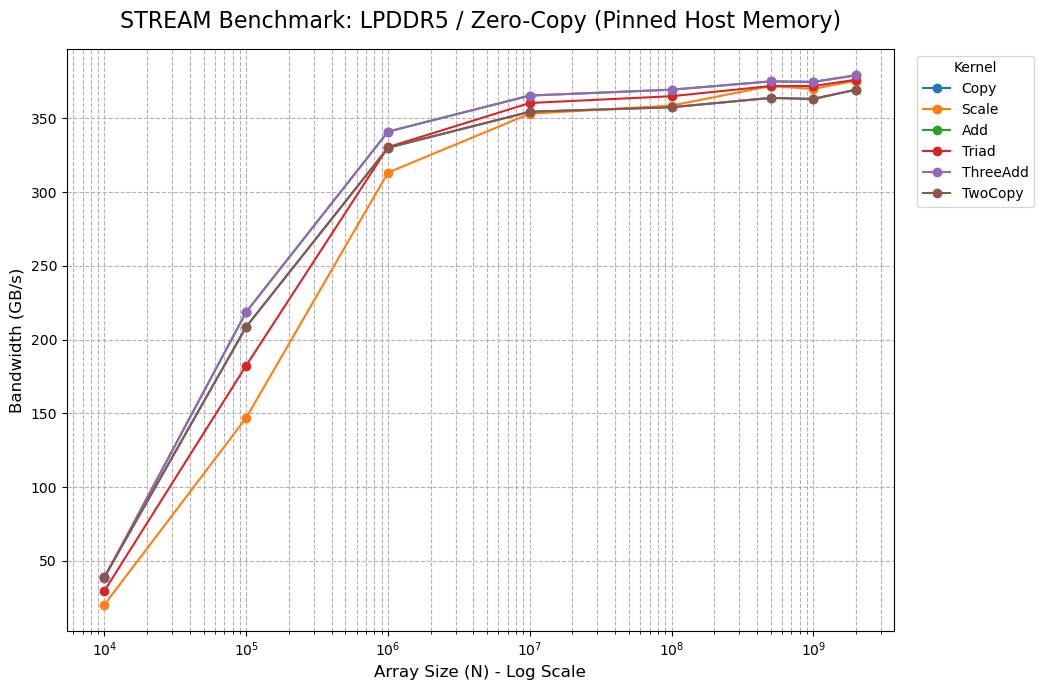

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# --- Configuration ---
csv_files = [
    'stream_HBM.csv',
    'stream_ManagedHost.csv',
    'stream_LPDDR5NoMigrate.csv'
]

model_names = [
    'HBM (Standard Device Memory)',
    'Managed Host (Unified Memory)',
    'LPDDR5 / Zero-Copy (Pinned Host Memory)'
]

kernels = ['Copy', 'Scale', 'Add', 'Triad', 'ThreeAdd', 'TwoCopy']

# Toggle to use fixed y-axis scale
use_fixed_yaxis = False
fixed_yaxis_limits = (0, 4000)

# --- File Check ---
missing_files = [file for file in csv_files if not os.path.exists(file)]
if missing_files:
    print("Error: The following CSV files were not found in this directory:")
    for f in missing_files:
        print(f" - {f}")
    print("\nPlease make sure this Python script is in the same folder as your CSV files.")
    sys.exit(1)

# --- Plotting ---
for file, model_name in zip(csv_files, model_names):
    plt.figure(figsize=(12, 7))
    df = pd.read_csv(file)

    for kernel in kernels:
        rate_column = f'{kernel}_Rate'
        if rate_column in df.columns:
            plt.plot(df['N'].to_numpy(), df[rate_column].to_numpy(), marker='o', linestyle='-', label=kernel)

    plt.xscale('log')
    plt.title(f'STREAM Benchmark: {model_name}', fontsize=16, pad=15)
    plt.ylabel('Bandwidth (GB/s)', fontsize=12)
    plt.xlabel('Array Size (N) - Log Scale', fontsize=12)
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend(title='Kernel', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Apply fixed y-axis scale if enabled
    if use_fixed_yaxis:
        plt.ylim(fixed_yaxis_limits)

    plt.tight_layout(rect=[0, 0, 0.88, 1])
    save_filename = f"{file.replace('.csv', '')}_results.png"
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved as '{save_filename}'")
    plt.show()